In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,LSTM
from tensorflow.keras import Sequential
from keras.models import Sequential
import pandas_datareader as pdr
from pandas_datareader import data, wb

Using TensorFlow backend.


In [2]:
#df = pd.read_csv('Downloads/AAL.csv')
df = pdr.get_data_yahoo('TSLA', start = '2010-07-01', end = '2021-02-23')
#df.drop(['Volume','Open','High','Low','Adj Close'],axis=1,inplace=True)
#df["Date"] = pd.to_datetime(df['Date'], format='%Y.%m.%d')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-01,5.184000,4.054000,5.000000,4.392000,41094000.0,4.392000
2010-07-02,4.620000,3.742000,4.600000,3.840000,25699000.0,3.840000
2010-07-06,4.000000,3.166000,4.000000,3.222000,34334500.0,3.222000
2010-07-07,3.326000,2.996000,3.280000,3.160000,34608500.0,3.160000
2010-07-08,3.504000,3.114000,3.228000,3.492000,38557000.0,3.492000
...,...,...,...,...,...,...
2021-02-17,799.840027,762.010010,779.090027,798.150024,25996500.0,798.150024
2021-02-18,794.690002,776.270020,780.900024,787.380005,17897000.0,787.380005
2021-02-19,796.789978,777.369995,795.000000,781.299988,18904800.0,781.299988


In [3]:
data = df.filter(['Close'])
dataset = data.values

In [4]:
ts = df.groupby("Date")["Close"].sum().rename("Trend")

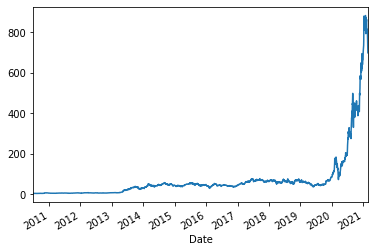

In [5]:
ts.plot()

In [6]:
train_data_length = math.ceil(len(dataset)* 0.8)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [7]:
train_data = scaled_data[0:train_data_length, : ]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.40011146e-03, 7.72788526e-04, 7.04599183e-05, 0.00000000e+00,
       3.77302748e-04, 3.63665205e-04, 2.84113500e-04, 5.31860399e-04,
       9.18254662e-04, 9.29619191e-04, 1.10008713e-03, 1.38874666e-03,
       1.02280844e-03, 1.00462541e-03, 1.18191185e-03, 1.24782628e-03,
       1.17054759e-03, 1.07963136e-03, 1.11827070e-03, 1.03417324e-03,
       9.40983720e-04, 1.16372882e-03, 1.39783817e-03, 1.24100751e-03,
       1.05690230e-03, 8.61432016e-04, 8.63705030e-04, 7.34149181e-04,
       4.77310496e-04, 4.09123321e-04, 5.72772758e-04, 6.77326535e-04,
       7.61423997e-04, 6.75053521e-04, 6.79599278e-04, 7.50059468e-04,
       9.84169094e-04, 7.72788526e-04, 9.31892205e-04, 8.97798618e-04,
       8.86434089e-04, 9.25073434e-04, 8.36429944e-04, 1.05690230e-03,
       1.19554939e-03, 1.19327665e-03, 1.07735807e-03, 1.15918279e-03,
       1.11599796e-03, 9.93260609e-04, 1.11827070e-03, 1.20918693e-03,
       1.40465694e-03, 1.16827485e-03, 1.00689815e-03, 1.19554939e-03,
     

In [8]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2084, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
2084/2084 [==============================] - 109s 52ms/step - loss: 3.5075e-05


In [10]:
test_data = scaled_data[train_data_length-60:, :]
x_test = []
y_test = dataset[train_data_length:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [11]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [12]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

39.03415961052055

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


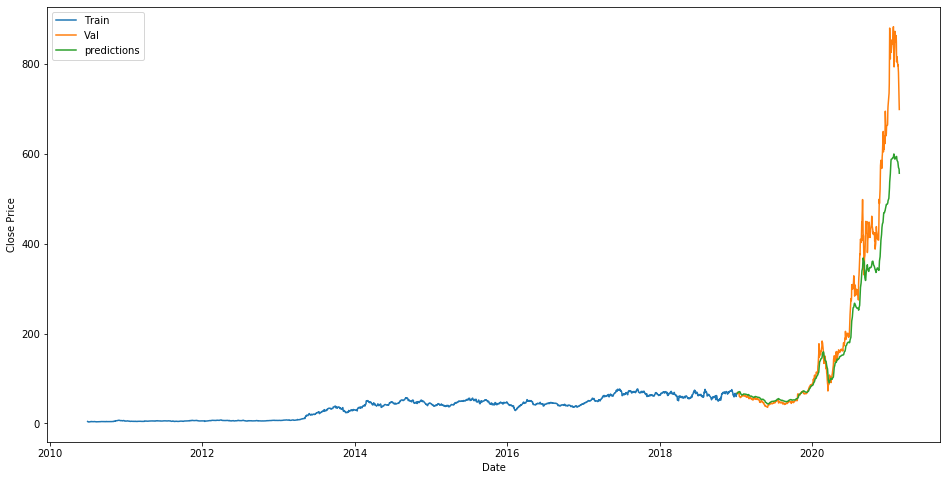

In [13]:
train = data[:train_data_length]
valid = data[train_data_length:]
valid['predictions']= predictions
plt.figure(figsize = (16,8))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'])
plt.show()

In [14]:
valid

,Close,predictions
Date,,
2019-01-08,67.070000,66.934868
2019-01-09,67.706001,67.448624
2019-01-10,68.994003,68.081795
2019-01-11,69.452003,68.833580
2019-01-14,66.879997,69.592331
...,...,...
2021-02-17,798.150024,577.616821
2021-02-18,787.380005,573.782471
2021-02-19,781.299988,569.878845


In [15]:
df_2 = df.filter(['Close']) 
last_60days = df_2[-60: ].values 
last_60days_scaled = scaler.transform(last_60days)

In [16]:
X_test = []
X_test.append(last_60days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [17]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[545.75586]]
